In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

import tensorflow as tf

import os

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = "1"
config = tf.compat.v1.ConfigProto() # Another Version: config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [3]:
## Data loading
data_name = 'energy'
seq_len = 24

if data_name in ['stock', 'energy']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 5
  ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')

energy dataset is ready.


In [4]:
# Run TimeGAN
generated_data = np.load("energy_data_TimeGAN_5000_sce2-1.npy")
generated_data = list(generated_data)
print('Finish Synthetic Data Generation')

Finish Synthetic Data Generation


In [5]:
np.asarray(generated_data).shape, np.asarray(ori_data).shape

((392428, 24, 28), (19711, 24, 28))

In [6]:
generated_data[0][0]

array([0.12115005, 0.03207877, 0.74012636, 0.43664947, 0.53981083,
       0.59288138, 0.67908149, 0.51685602, 0.7477017 , 0.58341515,
       0.64455026, 0.32030833, 0.67245549, 0.1632596 , 0.69246357,
       0.52087724, 0.71678561, 0.5121634 , 0.77387588, 0.58025843,
       0.62820551, 0.46469104, 0.65534897, 0.34845337, 0.5269624 ,
       0.73845136, 0.09690335, 0.09670153])

In [7]:
metric_iteration = 5
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print("the predictive scores are:", predictive_score)
print("the average value of predicted score: ", str(np.round(np.mean(predictive_score), 4)))
print("the std value of predicted score: ", str(np.round(np.std(predictive_score), 4)))





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instr

2021-08-12 12:38:50.024766: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-08-12 12:38:50.073838: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:5e:00.0
2021-08-12 12:38:50.074122: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-12 12:38:50.075563: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-12 12:38:50.077027: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-12 12:38:50.077364: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-12 12:38:50.079256: I tensorflow/stream_executor/platfo

2021-08-12 12:38:50.312897: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-08-12 12:38:50.313226: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      0 
2021-08-12 12:38:50.313257: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1178] 0:   N 
2021-08-12 12:38:50.320853: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1304] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30591 MB memory) -> physical GPU (device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:5e:00.0, compute capability: 7.0)
2021-08-12 12:38:50.323582: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x556189679f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-08-12 12:38:50.323613: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2021-08-12 12:38:51.745365: I tens

Predictive score: 0.2909


the predictive scores are: [0.2876596361623018, 0.2869601421583283, 0.289782626588927, 0.29624937184731676, 0.293724703729499]
the average value of predicted score:  0.2909
the std value of predicted score:  0.0036


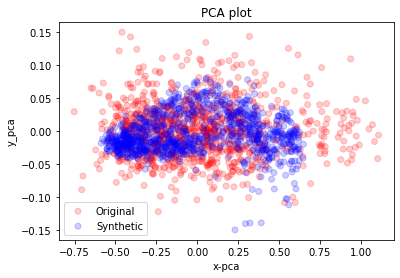

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.106s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.046727
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.913551
[t-SNE] KL divergence after 300 iterations: 1.461302


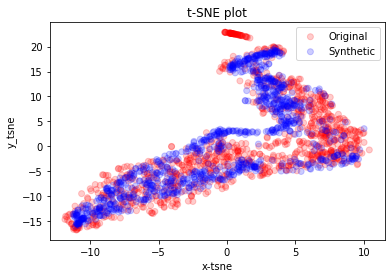

In [12]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')